In [1]:
!pip install -q tensorflow-gpu==2.0.0.alpha0
import tensorflow as tf
print(tf.__version__)
from tensorflow.python.keras.datasets import fashion_mnist
import numpy as np

2.0.0-alpha0


In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and cast the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [0]:
split = 50000

x_val = x_train[split:]
y_val = y_train[split:]

x_train = x_train[:split]
y_train = y_train[:split]

In [0]:
y_train_ohe = tf.one_hot(y_train, depth=10).numpy()
y_val_ohe = tf.one_hot(y_val, depth=10).numpy()
y_test_ohe = tf.one_hot(y_test, depth=10).numpy()

In [0]:
class MyModel(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(MyModel, self).__init__()
        inputs = tf.keras.Input(shape=(28,28))
        self.flatten = tf.keras.layers.Flatten()
        self.dense = tf.keras.layers.Dense(10)
        
    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.dense(x)
        
        with tf.device('/cpu:0'):
            x = tf.nn.softmax(x)
        return x

In [6]:
model = MyModel()
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_ohe, validation_data=(x_val, y_val_ohe), epochs=10, shuffle=False)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 104us/sample - loss: 0.6199 - accuracy: 0.7921 - val_loss: 0.5138 - val_accuracy: 0.8263
Epoch 2/10
50000/50000 [==============================] - 5s 95us/sample - loss: 0.4705 - accuracy: 0.8400 - val_loss: 0.4755 - val_accuracy: 0.8374
Epoch 3/10
50000/50000 [==============================] - 5s 95us/sample - loss: 0.4418 - accuracy: 0.8491 - val_loss: 0.4584 - val_accuracy: 0.8428
Epoch 4/10
50000/50000 [==============================] - 5s 95us/sample - loss: 0.4266 - accuracy: 0.8535 - val_loss: 0.4487 - val_accuracy: 0.8462
Epoch 5/10
50000/50000 [==============================] - 5s 93us/sample - loss: 0.4166 - accuracy: 0.8565 - val_loss: 0.4426 - val_accuracy: 0.8471
Epoch 6/10
50000/50000 [==============================] - 6s 111us/sample - loss: 0.4094 - accuracy: 0.8584 - val_loss: 0.4385 - val_accuracy: 0.8497
Epoch 7/10
50000/50000 [==============================

In [7]:
model.evaluate(x_test, y_test_ohe)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.4578 - accuracy: 0.8422


[0.4577962409973145, 0.8422]

In [11]:
fashion_labels = ["Shirt/top","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

val1 = model.predict(x_test)
index_predicted = np.argmax(val1[42])
index_true = np.argmax(y_test_ohe[42])

print(f'When prediction is: {index_predicted}')
print(f'ie. predicted label is: {fashion_labels[index_predicted]}')
print(f'True label is: {fashion_labels[index_true]}')

When prediction is 0
ie. predicted label is Shirt/top
True label is: Dress




Predicted V (True) fashion labels, green is correct, red is wrong


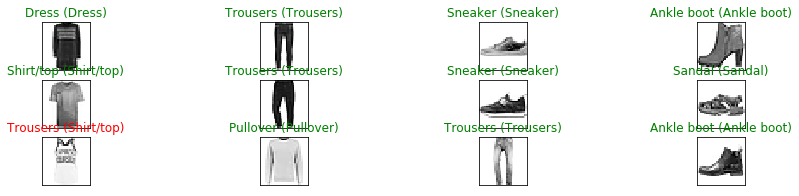

In [15]:
import matplotlib.pyplot as plt
print ("\n\nPredicted v (True) fashion labels, green is correct, red is wrong")
size = 12
fig = plt.figure(figsize=(15,3))
rows = 3
cols = 4
width = height = 28

for i, index in enumerate(np.random.choice(x_test.shape[0], size = size, replace = False)):
          axis = fig.add_subplot(rows,cols,i+1, xticks=[], yticks=[])
          axis.imshow(x_test[index].reshape(width,height), cmap="Greys")
          index_predicted = np.argmax(val1[index])
          index_true = np.argmax(y_test_ohe[index])
          axis.set_title(("{} ({})").format(fashion_labels[index_predicted],fashion_labels[index_true]),
                                                  color=("green" if index_predicted==index_true else "red"))